# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [93]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [94]:
# read the data
df = pd.read_csv('foodhub_order.csv')

# Change Not Given in rating column to NA values and change rating to float for easier analysts on rating
df['rating'] = df['rating'].replace("Not given",np.nan).astype(float)

# Add total time variable from question 15
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Adding total revenue from question 14
df['net_revenue'] = df['cost_of_the_order'].apply(lambda x: x * .25 if x > 20 else x * .15 if x > 5 else 0)

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time,net_revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49,1.7385


In [95]:
# Rating has NA values which is expected based on changing Not given to NA in above
df.isna().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
total_time                 0
net_revenue                0
dtype: int64

#### Observations:

The DataFrame has 11 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [96]:
# Write your code here
df.shape

(1898, 11)

#### Observations:
There are 1898 rows and 11 columns, 2 of which was created by me during analysis

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [97]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   total_time             1898 non-null   int64  
 10  net_revenue            1898 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 163.2+ KB


#### Observations:
The numiercal data types are either integers or floats. The object data types are categories and should probably be changed to the category data type before analysis

### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [98]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

# Use info() to print a concise summary of the DataFrame
df['restaurant_name'] = df.restaurant_name.astype('category')
df['cuisine_type'] = df.cuisine_type.astype('category')
df['day_of_the_week'] = df.day_of_the_week.astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1162 non-null   float64 
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
 9   total_time             1898 non-null   int64   
 10  net_revenue            1898 non-null   float64 
dtypes: category(3), float64(3), int64(5)
memory usage: 133.4 KB


#### Observations:
Current Memory Usage is 163.2+ KB <br>
New Memory usage is 133.4+ KB <br>
Memory Savings of 29.8+ KB <br>

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [99]:
# Write your code here
print(df['food_preparation_time'].describe())
print("-------------------------------------------")
print("The minimum food preperation time is " + str(df['food_preparation_time'].min()))
print("The average food preperation time is " + str(round(df['food_preparation_time'].mean(),2)))
print("The maximum food preperation time is " + str(df['food_preparation_time'].max()))

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64
-------------------------------------------
The minimum food preperation time is 20
The average food preperation time is 27.37
The maximum food preperation time is 35


#### Observations:
There is not much of a skew to the food preperation time and not many outliers. There is a slight difference between the median and the mean. The stardard deviation is pretty low and the max and min are both within 2 standard deviations to the mean

### **Question 5:** How many orders are not rated? [1 mark]

In [100]:
print(df['rating'].isna().sum())

print(df['rating'].isna().sum() / len(df['rating']) * 100)

736
38.77766069546891


#### Observations:
There are 736 ratings missing which is 38.78% of the data

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

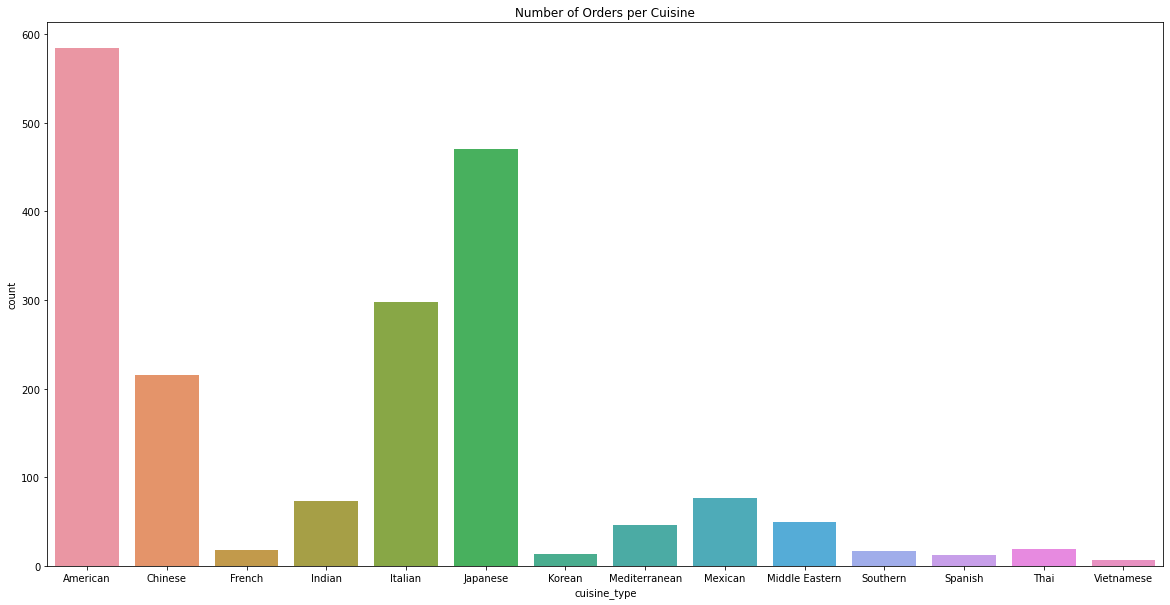

In [101]:
# Look at the most common cuisines
plt.figure(figsize=(20,10))
sns.countplot(x=df['cuisine_type']).set(title='Number of Orders per Cuisine')
plt.show()

# Most common cusines by far are American and Japanese

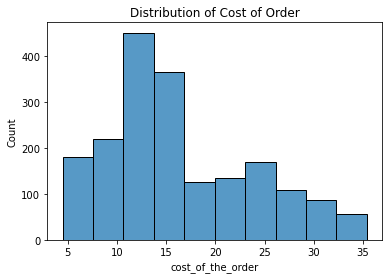

In [102]:
# Plot to check distribution of the cost of orders
sns.histplot(df['cost_of_the_order'],bins=10).set(title='Distribution of Cost of Order')
plt.show()

# Most orders are between $10-$17

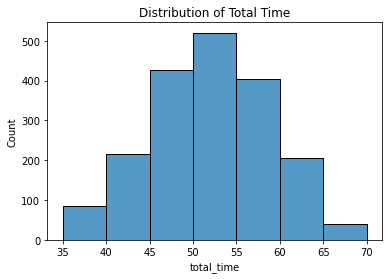

In [103]:
# Check distribution of total time
sns.histplot(df['total_time'],bins=[35,40,45,50,55,60,65,70]).set(title='Distribution of Total Time')
plt.show()

# Most orders are between 45-60 minutes
# Data is evenly distributed and looks like bell curve

5.0    50.602410
4.0    33.218589
3.0    16.179002
Name: rating, dtype: float64

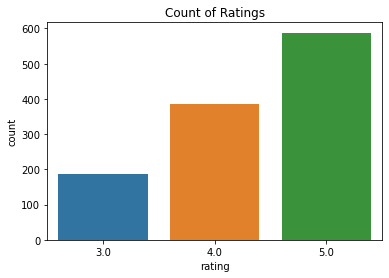

In [104]:
# See what the most common ratings are
sns.countplot(x=df['rating']).set(title="Count of Ratings")

df['rating'].value_counts(normalize=True) * 100

# 5 is the most common rating by a large margin
# 51% of the ratings are 5 stars followed by 33% 4 star and 16% 3 star

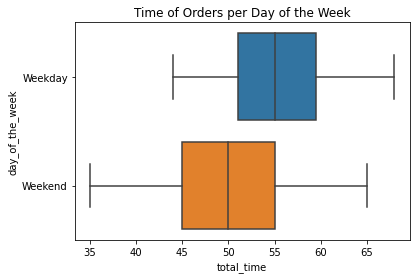

In [105]:
sns.boxplot(data = df, x='total_time',y='day_of_the_week').set(title="Time of Orders per Day of the Week")
plt.show()

# Orders normally take longer during the weekdays than the weekends

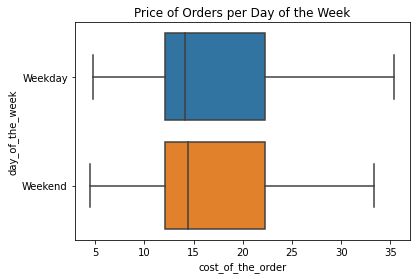

In [106]:
sns.boxplot(data = df, x='cost_of_the_order',y='day_of_the_week').set(title="Price of Orders per Day of the Week")
plt.show()

# No difference in the cost of the oder on the weekdays vs weekends

Weekend    71.18019
Weekday    28.81981
Name: day_of_the_week, dtype: float64

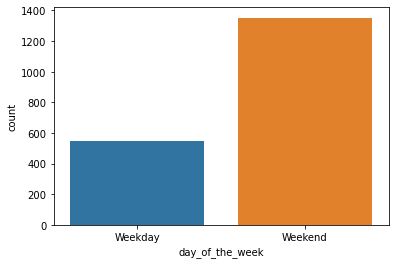

In [107]:
sns.countplot(x=df['day_of_the_week'])

df['day_of_the_week'].value_counts(normalize=True) * 100

# 72% of orders are on the weekends even though there are less days on the weekend

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [108]:
# Write the code here
df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).reset_index().head()

,restaurant_name,order_id
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:
The top 5 restaurants are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [109]:
# Write the code here
df[df['day_of_the_week'] == 'Weekend'].groupby('cuisine_type')['order_id'].count().sort_values(ascending=False).reset_index().head()

,cuisine_type,order_id
0,American,415
1,Japanese,335
2,Italian,207
3,Chinese,163
4,Mexican,53


#### Observations:
American is the most popular cuisine on Weekends with 80 more orders than the 2nd highest and 208 more orders than the 3 highest

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [110]:
# Write the code here
len(df[df['cost_of_the_order'] > 20]) / len(df['cost_of_the_order']) * 100

29.24130663856691

#### Observations:
29.24% of orders are more than $20

### **Question 10**: What is the mean order delivery time? [1 mark]

In [111]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean delivery time is 24.16 minutes (24 minutes and 9.6 seconds)

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [112]:
df.groupby('customer_id')['order_id'].count().sort_values(ascending=False).reset_index().head(5)

,customer_id,order_id
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,65009,7


#### Observations:
The most popular customers are 52832 who placed 13 orders, 47440 who placed 10 orders, 83287 who placed 9 orders, 250494 who placed 8 orders and 65009 who placed 7 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


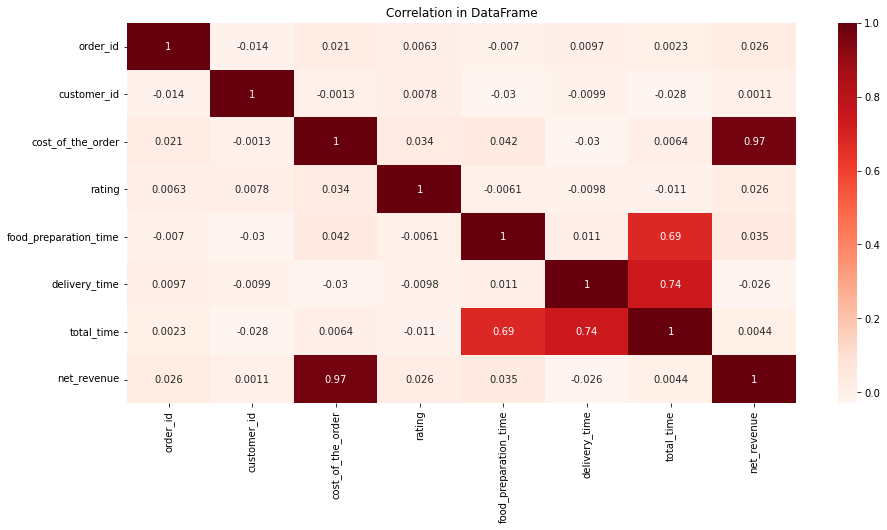

In [113]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, cmap="Reds").set(title="Correlation in DataFrame")
plt.show()

# Looking at correlation between the variables,specifically rating which does not have any fields that it is strongly correlated to
# Net revenue is not strongly correlated to anything except cost of the order which is expected

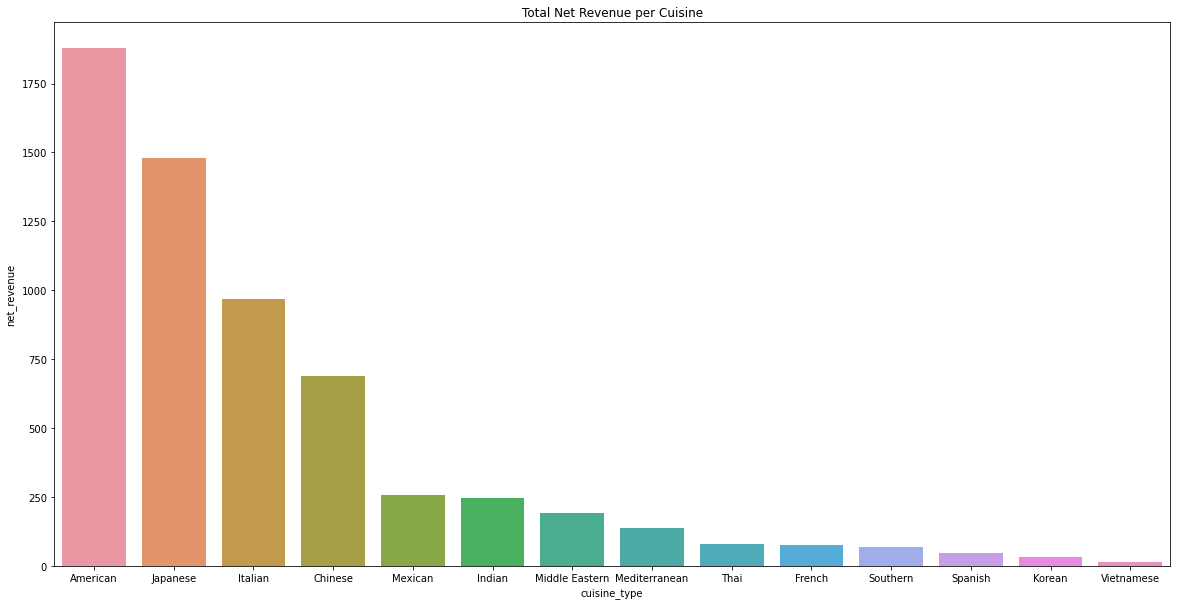

In [114]:
# See which cuisines have made the most net revenue
plt.figure(figsize=(20, 10))
sns.barplot(x='cuisine_type', y='net_revenue', ci=None, estimator=sum, data=df, order=df.groupby('cuisine_type').net_revenue.sum().sort_values(ascending=False).index).set(title="Total Net Revenue per Cuisine")
plt.show()

# American, Japanese and Italian generate the most revenue

In [115]:
# Check percentage of revenue that each cuisine generates
df.groupby('cuisine_type').agg({'net_revenue':'sum'}).apply(lambda x: x*100 / x.sum()).sort_values('net_revenue',ascending=False)

# American and Japanese generate 54% of the net revenue

,net_revenue
cuisine_type,
American,30.460294
Japanese,23.972946
Italian,15.680133
Chinese,11.190506
Mexican,4.162835
Indian,4.005544
Middle Eastern,3.138891
Mediterranean,2.210855
Thai,1.265791


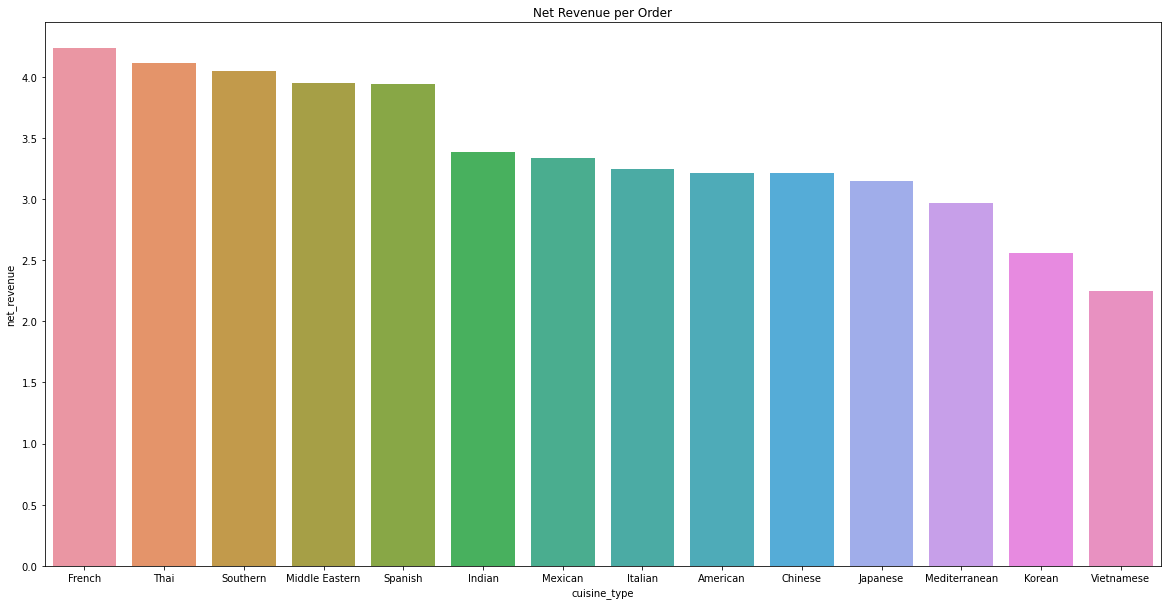

In [116]:
plt.figure(figsize=(20, 10))
sns.barplot(x='cuisine_type',y='net_revenue',ci=None, data=df, order=df.groupby('cuisine_type').net_revenue.mean().sort_values(ascending=False).index).set(title="Net Revenue per Order")
plt.show()

# On average French, Thai, Southern, Middle Eastern and Spanish restaurants generate the most revenue per order

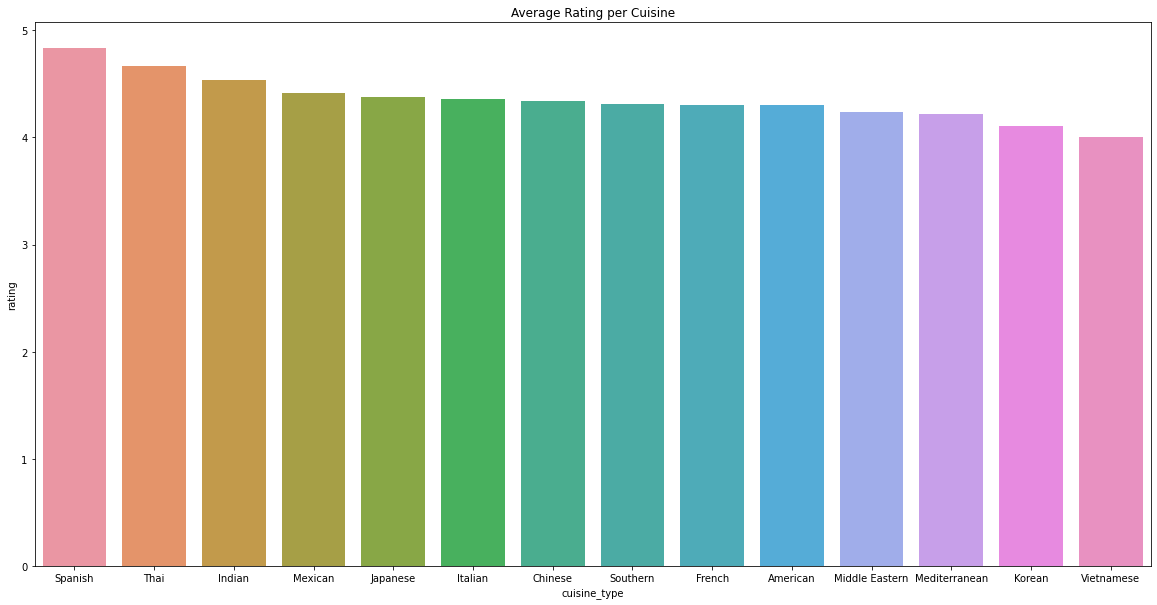

In [117]:
plt.figure(figsize=(20, 10))
sns.barplot(x='cuisine_type', y='rating', ci=None, data=df, order=df.groupby('cuisine_type').rating.mean().sort_values(ascending=False).index).set(title="Average Rating per Cuisine")
plt.show()

# Spanish, Thai and Indian have the highest average rating

In [118]:
# How many of each type of cuisine is on food hub and how many orders per restaurant
cuisine = df.groupby(['cuisine_type']).agg({'restaurant_name':['nunique','count'],'rating':['mean','count']}).reset_index()
cuisine['restaurant_name','orders_per_restuarant'] = cuisine['restaurant_name','count'] / cuisine['restaurant_name','nunique']
cuisine = cuisine[['cuisine_type','restaurant_name','rating']]
cuisine.sort_values(('rating','mean'),ascending=False,inplace=True)
cuisine

# Spanish, Thai and Indian have the best Ratings even though spanish and Thai have a small amount of ratings
# Japanese, Chinese, American have the most orders per restaurant
# American, Japanes, Italian have the most unique restaurants on the FoodHub app

cuisine_type restaurant_name                                rating      
                           nunique count orders_per_restuarant      mean count
11         Spanish               3    12              4.000000  4.833333     6
12            Thai               9    19              2.111111  4.666667     9
3           Indian              14    73              5.214286  4.540000    50
8          Mexican              11    77              7.000000  4.416667    48
5         Japanese              29   470             16.206897  4.373626   273
4          Italian              31   298              9.612903  4.360465   172
1          Chinese              16   215             13.437500  4.338346   133
10        Southern               2    17              8.500000  4.307692    13
2           French               3    18              6.000000  4.300000    10
0         American              41   584             14.243902  4.298913   368
9   Middle Eastern               7    49              7.000000  4.235294    34
7    Mediterranean               5    46              9.200000  4.218750    32
6           Korean               5    13              2.600000  4.111111     9
13      Vietnamese               3     7              2.333333  4.000000     5

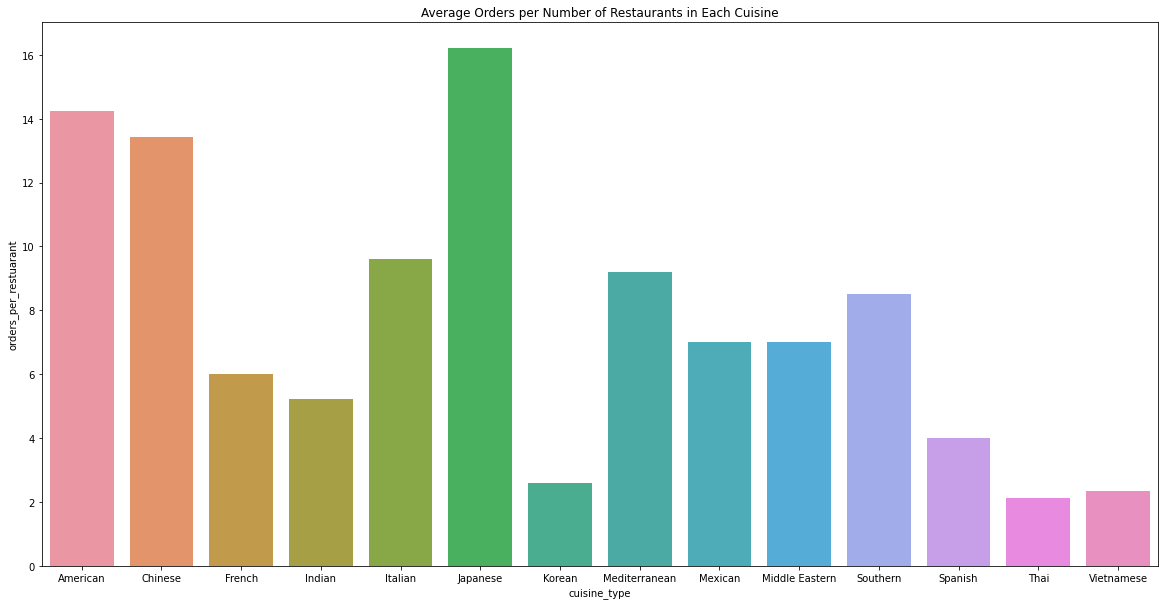

In [119]:
plt.figure(figsize=(20, 10))
sns.barplot(x=cuisine['cuisine_type'], y=cuisine['restaurant_name']['orders_per_restuarant'],ci=None).set(title='Average Orders per Number of Restaurants in Each Cuisine')
plt.show()

# Japanese, American and Chinese have the most orders per restaurant on the FoodHub app

In [120]:
df[df['rating'].isna()].groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(20).reset_index()

# Top 20 clients with NA reviews. These are clients to target with promotions if they add ratings in the future

,customer_id,order_id
0,52832,6
1,83287,5
2,97079,4
3,275689,3
4,177078,3
5,68551,3
6,186473,3
7,49631,3
8,97991,3
9,175290,3


In [121]:
df.groupby('day_of_the_week').agg({'food_preparation_time':'mean','delivery_time':"mean"})

# Food preperation time is almost even between weekday and weekends but delivery time is 6 minutes longer

,food_preparation_time,delivery_time
day_of_the_week,,
Weekday,27.212066,28.340037
Weekend,27.436714,22.470022


In [122]:
df.groupby('day_of_the_week').agg({'rating':'mean'})

# Weekends have a slightly higher rating that weekdays which could be because of the quicker delivery time

,rating
day_of_the_week,
Weekday,4.308824
Weekend,4.358881


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [123]:
# Write the code here
rating = df.groupby('restaurant_name')['rating'].agg(['count','mean']).reset_index()
rating.loc[(rating['mean'] > 4) & (rating['count'] > 50)] 

,restaurant_name,count,mean
20,Blue Ribbon Fried Chicken,64,4.328125
21,Blue Ribbon Sushi,73,4.219178
136,Shake Shack,133,4.278195
153,The Meatball Shop,84,4.511905


#### Observations:
4 restaurants have more than 50 ratings and an average above 4. There are no restaurants with more than 50 ratings and a mean less than 4. All restaurants that have a high amount of ratings also have a high average rating

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [124]:
# Write the code here    
# Added net_revenue column earlier in noteboook to keep all new fields together
df['net_revenue'].sum()

6166.303

#### Observations:
The total revenue the company has made is $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [125]:
# Write the code here
# Added total_time column earlier in spreadsheet
len(df[df['total_time'] > 60])/ len(df['total_time']) * 100

10.537407797681771

#### Observations:
10.54% of orders take more than 60 minutes

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [126]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
The mean time for delivery is 6 minutes longer on weekdays than weekends. This is probably due to more traffic during the week 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

# **Conclusion and Recommendations**

## Conclusion

Analyzed a data set of 1898 orders on FoodHub app in New York.
The main features of interest here were cuisine type, ratings and revenue

We have been able to conclude that:

1. The most popular cuisine for number of orders is American, Japanese, Italian
2. The highest average rated cuisines are Spanish, Thai and Indian, but Spanish and Thai have very few ratings
3. 38.77% of orders are not rated
4. There is no correlation between time of order and rating
5. American and Japanese generate 54% of net revenue
6. Orders take 6 minutes longer on weekdays vs weekends which is all due to longer delivery times
7. 71% of the orders are during the weekend
8. Japanese, American and Chinese have the most orders per number of restaurants
9. There are 19 customers who have had 3 or more orders without leaving ratings
10. 51% of the ratings are 5 stars, 33% are 4 stars and 17% 3 stars


## Recommendation to business
1. Target more Japanese and American restaurants as these generate the most orders per restaurant and make up a majority of our revenue
2. Provide coupons to our top 20 customers who have the most orders without ratings if they leave a rating for their next order
3. Hire more delivery drivers during the week to ensure faster deliverys and increase customer orders
4. Southern restaurants are a potential growth area as the generate the 3rd most revenue and 6th most orders per restaurant
5. Procure data on date, date, time and location of order to better create staffing decisions behind delivery drivers
6. Procure better data on users to better make predictions about similar users